# The data below cleans and analyses patterns in soccer data for the European Premiere League from 2013 to 2019.


### The data is broken down by team, to analyze how the best teams have performed across various metrics when compared to the worst teams. 

### The data was taken from the English Premiere League's website.


Code was also pulled from prior projects, including the class's initital UVLT Data Visualization notebook and from sources on stack overflow.

In [1]:
#Reading in and importing the tools and data I want to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hypertools as hyp
from glob import glob as lsdir
import os
import re
import datetime as dt
import altair as alt
import plotly_express as px
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


%matplotlib inline

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')
/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import plotly.graph_objs as go

In [3]:
#importing all of my data as csv files

season1314= pd.read_csv('season-1314_csv.csv')
season1415= pd.read_csv('season-1415_csv.csv')
season1516= pd.read_csv('season-1516_csv.csv')
season1617= pd.read_csv('season-1617_csv.csv')
season1718= pd.read_csv('season-1718_csv.csv')
season1819= pd.read_csv('season-1819_csv.csv')

In [4]:
season1314.head(20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2013-08-17,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,...,4,4,15,18,4,3,4,5,1,0
1,2013-08-17,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,...,11,4,11,11,12,6,1,1,0,0
2,2013-08-17,Norwich,Everton,2,2,D,0,0,D,M Oliver,...,2,6,13,10,6,8,2,0,0,0
3,2013-08-17,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,...,3,1,14,14,6,1,0,3,0,0
4,2013-08-17,Swansea,Man United,1,4,A,0,2,A,P Dowd,...,6,7,13,10,7,4,1,3,0,0
5,2013-08-17,West Brom,Southampton,0,1,A,0,0,D,K Friend,...,1,2,14,24,4,8,4,0,0,0
6,2013-08-17,West Ham,Cardiff,2,0,H,1,0,H,H Webb,...,4,1,10,7,4,3,0,1,0,0
7,2013-08-18,Chelsea,Hull,2,0,H,2,0,H,J Moss,...,5,2,7,16,5,1,0,1,0,0
8,2013-08-18,Crystal Palace,Tottenham,0,1,A,0,0,D,M Clattenburg,...,3,2,6,9,3,7,1,0,0,0
9,2013-08-19,Man City,Newcastle,4,0,H,2,0,H,A Marriner,...,11,1,9,7,8,1,2,3,0,1


In [5]:
#Combine all of the seasons into one dataframe

list= [season1314, season1415, season1516, season1617, season1718, season1819]
all_seasons= pd.concat(list, ignore_index=True)

In [6]:
#Renaming relevant columns in UVLT individual data to be more easily readable
names={ 'HomeTeam' : 'Home',
        'AwayTeam' : 'Away',
        'FTHG' : 'Full Time Home Goals',
       'FTAG': 'Full Time Away Goals',
      'FTR': 'Full Time Result',
      'HTHG' : 'Half Time Home Goals',
      'HTAG' : 'Half Time Away Goals',
       'HTR': 'Half Time Result',
      'HS' : 'Home Shots',
      'AS' : 'Away Shots',
      'HST' : 'Home Shots on Target',
      'AST' : 'Away Shots on Target',
      'HF' : 'Home Fouls',
      'AF' : 'Away Fouls',
      'HY' : 'Home Yellow Cards',
      'AY' : 'Away Yellow Cards',
      'HR' : 'Home Red Cards',
      'AR' : 'Away Red Cards'}

all_seasons.rename(names, inplace=True, axis=1)

In [7]:

#Gets a set of all of the teams
teams= set()

def get_teams(y):
    for x in all_seasons[y]:
        teams.add(x)

get_teams('Home')
get_teams('Away')



In [8]:
teams

{'Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Cardiff',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Huddersfield',
 'Hull',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Middlesbrough',
 'Newcastle',
 'Norwich',
 'QPR',
 'Southampton',
 'Stoke',
 'Sunderland',
 'Swansea',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham',
 'Wolves'}

In [144]:
#the code below scans the combined data set and for the team inputted returns 
#the games played, when, and the outcome


def code_wins(team):
    wins =[]
    dates = []
    r=0
    for x in all_seasons_teams.iloc[:,5]:
        if x == 'H' and all_seasons_teams.iloc[r, 1]== team:
            wins.append(3)
            dates.append(all_seasons_teams.iloc[r, 0])
        elif x == 'A' and all_seasons_teams.iloc[r, 2]== team:
            wins.append(3)
            dates.append(all_seasons_teams.iloc[r, 0])
        elif x == 'H' and all_seasons_teams.iloc[r, 1]!= team and all_seasons_teams.iloc[r, 2]== team:
            wins.append(0)
            dates.append(all_seasons_teams.iloc[r, 0])
        elif x == 'A' and all_seasons_teams.iloc[r, 2]!= team and all_seasons_teams.iloc[r, 1]== team:
            wins.append(0)
            dates.append(all_seasons_teams.iloc[r, 0])
        elif x == 'D' and all_seasons_teams.iloc[r, 1]== team or all_seasons_teams.iloc[r, 2] == team:
            wins.append(1)
            dates.append(all_seasons_teams.iloc[r, 0])
        else:
            r = r
        r = r + 1
        
    print(sum(wins))
    
    dates = [d.replace('-', '') for d in dates]
    dates = [int(x[:4]) for x in dates]
    team_array = np.array([(wins), (dates)])
    
    final_array = pd.DataFrame(team_array)
    final_array.rename({0:'Game Result', 1: 'Date of Game'}, inplace=True)
    final_array=final_array.transpose()
    
   
    
    

    

    return final_array
    



In [166]:
#Input team here to get total points for the season for each team.
#Output is total points for the season, where wins are 3, losses are 0, and ties are 1
#returns the dates associated with each game in a dataframe to be analysed for changes over time


Liverpool=code_wins('Liverpool')
Arsenal= code_wins('Arsenal')
Newcastle= code_wins('Newcastle')
Man_city= code_wins('Man City')

454
433
214
507


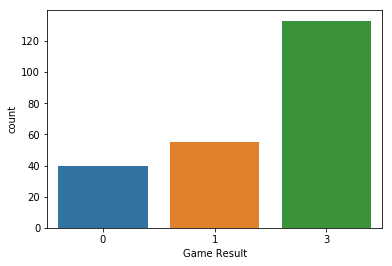

In [146]:
sns.countplot(x='Game Result', data=Liverpool)

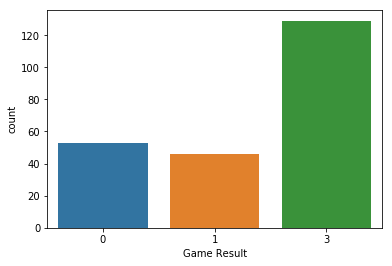

In [131]:
sns.countplot(x='Game Result', data=Arsenal)

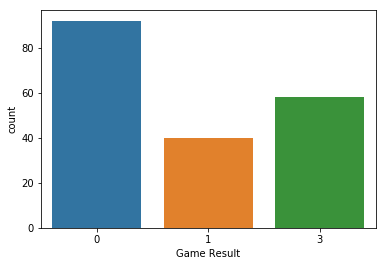

In [133]:
sns.countplot(x='Game Result', data=Newcastle)

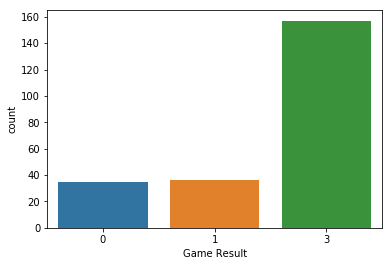

In [168]:
sns.countplot(x='Game Result', data=Man_city)

In [155]:
px.histogram(Arsenal, x="Date of Game", y="Game Result", color="Game Result")

In [156]:
px.histogram(Newcastle, x="Date of Game", y="Game Result", color="Game Result")

In [169]:
px.histogram(Man_city, x="Date of Game", y="Game Result", color="Game Result")

# The various above charts tend to confirm that certain teams remain at the top over numerous seasons, with teams like Man City consistently outperforming teams like Newcastle across all seasons since 2013. 

## Interesting within-team differences across various seasons can be spoted using the above analyses and could yield interesting future investigations, such as attempting to understand why Man City had two relatively dissapointing seasons in 2015 and 2016. 

# The below graphs plot the average statistics for each team across seasons. This is helpful in understanding how the best and worst teams score and foul differently.

In [135]:
avg_by_team = pd.DataFrame(all_seasons_teams.groupby('Home', as_index=True)['Full Time Home Goals'].mean())

In [163]:
avg_by_team['AVG Full Time Away Goals']= all_seasons_teams.groupby('Away', as_index=True)['Full Time Away Goals'].mean().values
avg_by_team['AVG Half Time Home Goals']= all_seasons_teams.groupby('Home', as_index=True)['Half Time Home Goals'].mean().values
avg_by_team['AVG Half Time Away Goals']= all_seasons_teams.groupby('Away', as_index=True)['Half Time Away Goals'].mean().values
avg_by_team['AVG Home Shots']= all_seasons_teams.groupby('Home', as_index=True)['Home Shots'].mean().values
avg_by_team['AVG Away Shots']= all_seasons_teams.groupby('Away', as_index=True)['Away Shots'].mean().values
avg_by_team['AVG Home Shots on Goal']= all_seasons_teams.groupby('Home', as_index=True)['Home Shots on Target'].mean().values
avg_by_team['AVG Away Shots on Goal']= all_seasons_teams.groupby('Away', as_index=True)['Away Shots on Target'].mean().values
avg_by_team['AVG Home Fouls']= all_seasons_teams.groupby('Home', as_index=True)['Home Fouls'].mean().values
avg_by_team['AVG Away Fouls']= all_seasons_teams.groupby('Away', as_index=True)['Away Fouls'].mean().values
avg_by_team['AVG Home Yellow']= all_seasons_teams.groupby('Home', as_index=True)['Home Yellow Cards'].mean().values
avg_by_team['AVG Away Yellow']= all_seasons_teams.groupby('Away', as_index=True)['Away Yellow Cards'].mean().values
avg_by_team.rename({'Full Time Home Goals' : 'Avg Full Time Home Goals'}, inplace=True, axis = 1)
avg_by_team.rename({'Home' : 'Team'}, inplace=True, axis = 1)


In [164]:
avg_by_team.reset_index(inplace=True)

In [165]:
avg_by_team.head(20)

,index,Team,Avg Full Time Home Goals,AVG Full Time Away Goals,AVG Half Time Home Goals,AVG Half Time Away Goals,AVG Home Shots,AVG Away Shots,AVG Home Shots on Goal,AVG Away Shots on Goal,AVG Home Fouls,AVG Away Fouls,AVG Home Yellow,AVG Away Yellow
0,0,Arsenal,2.131579,1.622807,0.894737,0.692982,16.605263,12.605263,6.368421,4.605263,10.000000,9.885965,1.464912,1.657895
1,1,Aston Villa,0.947368,0.754386,0.526316,0.385965,11.596491,9.666667,3.543860,2.982456,10.859649,12.210526,1.719298,2.192982
2,2,Bournemouth,1.500000,1.144737,0.644737,0.578947,13.052632,10.921053,4.447368,3.763158,9.210526,9.263158,1.526316,1.342105
3,3,Brighton,1.131579,0.684211,0.473684,0.394737,10.973684,8.710526,3.263158,2.684211,11.026316,12.026316,1.763158,1.236842
4,4,Burnley,1.052632,0.894737,0.552632,0.394737,11.302632,9.342105,3.500000,2.907895,10.144737,10.223684,1.684211,1.855263
5,5,Cardiff,1.078947,0.657895,0.368421,0.184211,12.052632,9.947368,3.736842,2.894737,9.526316,9.578947,1.526316,1.473684
6,6,Chelsea,2.061404,1.561404,0.964912,0.701754,17.333333,13.929825,6.271930,4.491228,10.140351,10.096491,1.377193,1.728070
7,7,Crystal Palace,1.140351,1.184211,0.482456,0.377193,13.140351,10.736842,4.228070,3.394737,11.491228,11.982456,1.543860,1.842105
8,8,Everton,1.754386,1.122807,0.745614,0.456140,14.087719,11.254386,4.868421,4.070175,10.201754,11.008772,1.447368,1.543860
9,9,Fulham,1.210526,0.736842,0.421053,0.315789,14.210526,9.052632,4.736842,3.105263,10.131579,11.078947,1.736842,1.552632


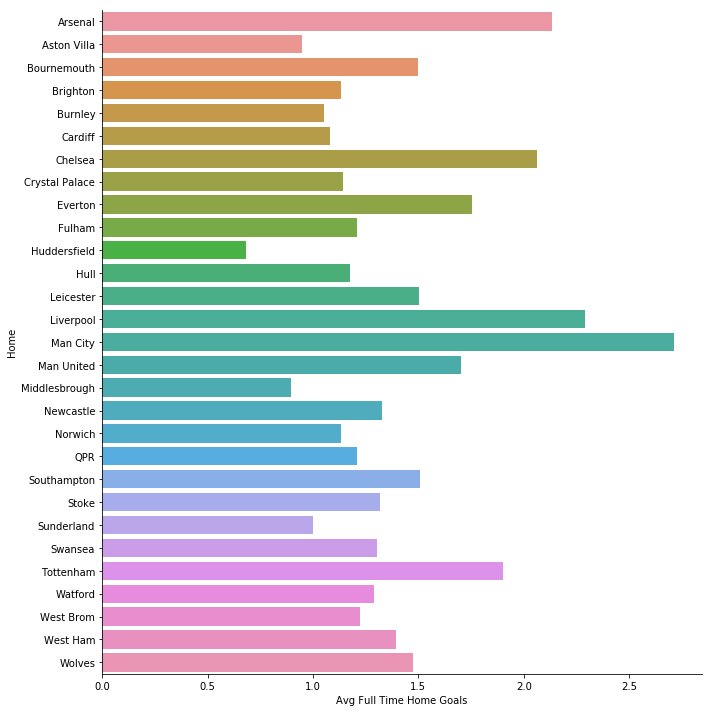

In [159]:
sns.catplot(x='Avg Full Time Home Goals', y='Team', data=avg_by_team, kind = 'bar', height=10)

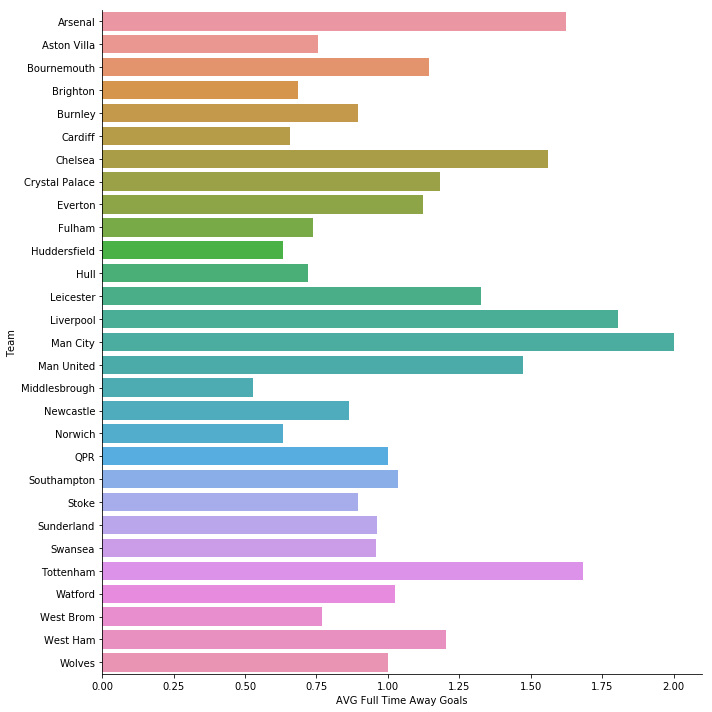

In [173]:
sns.catplot(x='AVG Full Time Away Goals', y='Team', data=avg_by_team,  kind = 'bar', height=10)

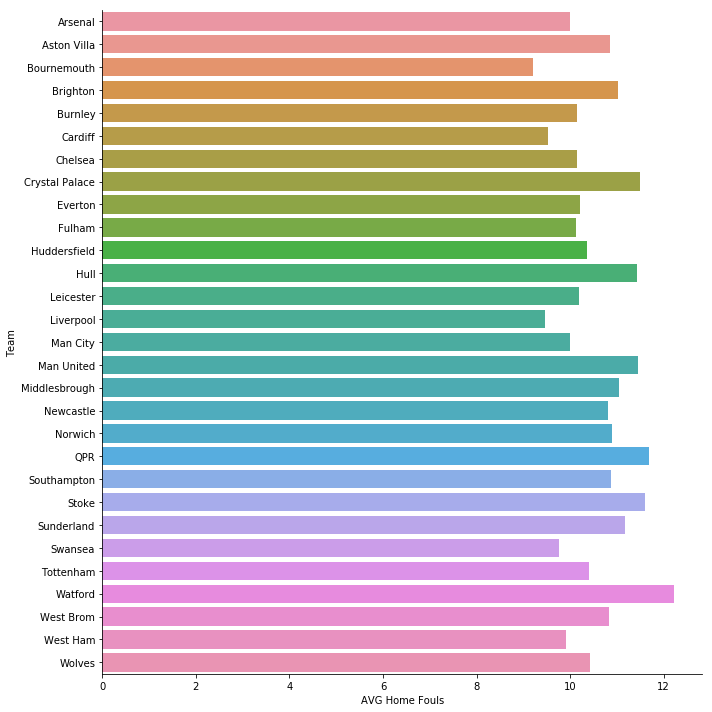

In [179]:
sns.catplot(x='AVG Home Fouls', y='Team', data=avg_by_team, kind = 'bar', height=10)

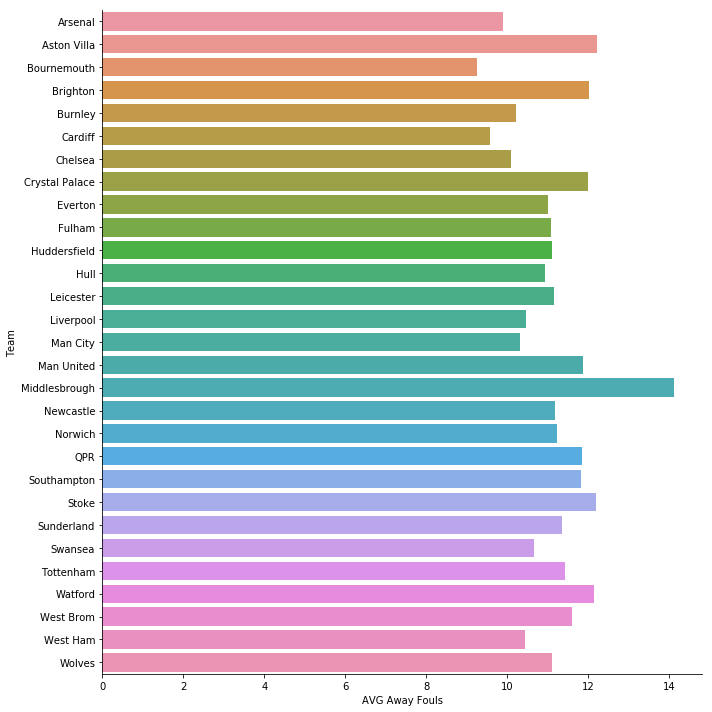

In [180]:
sns.catplot(x='AVG Away Fouls', y='Team', data=avg_by_team, kind = 'bar', height=10)

### All teams score on average fewer times in away games than at homes games, but interestingly tend to do so at the same relative rate across teams as their scoring during home games. This shows that the best teams seem to remain relatively better than worse teams at scoring at away games, to the point where they seem to out-perform the home team advantage of the worst teams.

### More interesting, however, is the result that scoring and winning seems to have no correlation with the tendency of a team to commit fouls, with teams displaying only a very slight tendency to foul more often in away games than in home games.

#### Potential Contributions

The above code could be contributed to in a myriad of ways. More visualizations and analyses could be run comparing how teams score across seasons to how many fouls or attempts on goal those teams have. Those results could be compared between home and away games as well to understand how much the "home team advantage" really helps. In addition predictive analyses could be run on teams' scoring, shooting, or fouling, to see if prior seasons are as predictive of future seasons as the above data seems to suggest.